# Hands-on 3: Univariate linear regression using a Keras/Tensorflow neural network

We’ll perform a regression using a neural network created using Keras/Tensorflow. We won’t go into the explanation what a neural network is yet. Tensorflow is Google's open source AI framework for machine learning. Keras is one of the leading high-level neural networks APIs. It is written in Python and supports multiple back-end neural network computation engines, for example Tensorflow.

Tensorflow.JS  is a version of Tensorflow ported to Javascript. In this hands-on we will use Tensorflow.JS to export our trained model to a file in Javascript format. In a later hands-on we will use this exported model to deploy our Keras/Tensorflow model.

**Installation of Keras/Tensorflow and Tensorflow.JS:**

Normally, installing an additional package is simply done using `conda install`, for example `conda install tensorflow -c conda-forge`. However, Tensorflow.JS is not available in the Anaconda repositories, so we're using `pip`. `pip` is another package manager, so an alternative to Anaconda. It's best no to mix the usage of conda and pip in the same environment (although it will often not cause problems), so we're going to create a new environment for this hands-on exercise:

* Start an Anaconda command prompt.
* Type `conda create -n tf python=3.9 numpy=1.23 protobuf=3.20 tensorflow matplotlib pandas notebook scitkit-learn`. This will create a new environment, named `tf`. 
* Type `conda activate tf`.
* Type `Get-Command pip` (for Powershell) and check that the path is something like `C:\Users\<user name>\anaconda\envs\tf\Scripts\pip.exe`. The reason to do this is that often there are multiple version of pip.exe present on your system. If another version is earlier in the Windows search path, it will use that version, potentially messing up your system.
* Type `pip install tensorflowjs`.

**Performing linear regression using a neural network:**
* We’re going to construct the neural network as shown in the picture. Note that the neural network only has an input and output layer, so no hidden layers. Note as well that it exactly represents the hypothesis function $h_\Theta(x)$, but the parameters to be learned are called $\omega_0$, $\omega_1$, ..., instead of $\Theta_0$, $\Theta_1$, ..., although they mean exactly the same. It's simply an inconvenience that different communities use different naming conventions.
  <img src="neuralNetworkForRegression.jpg" />
* The following picture shows the same neural network, but in a slightly more general form, namely that the output is a *function* of the weighted inputs, the so-called **activation function**. Linear regression means ‘the output is a linear function of the parameters. This is accomplished by using the linear activation function. 
  <img src="neuralNetworkForRegression2.png" />

***

## The source code

Below you'll find the source code to perform the linear regression using a neural network. Note that we’ve omitted many necessary steps in this example, like inspecting the data and creating a validation set.

The first block of code is familiar to you by now. It reads and visualizes the training set. 

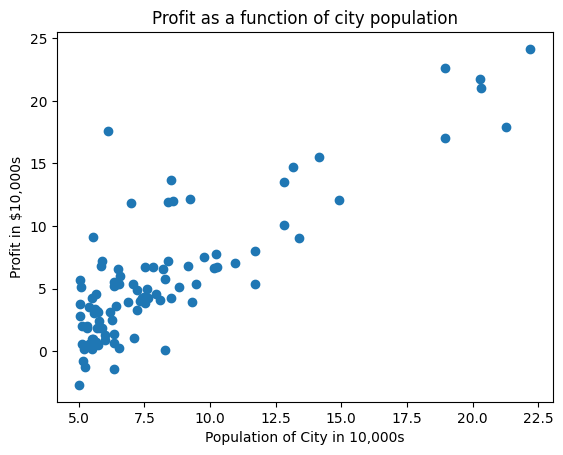

In [1]:
from pylab import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
import pandas as pd
import operator
from datetime import datetime

# read the training set
data = pd.read_csv("ex1data1.txt", header=None)  # read from dataset
data.head()  # view first few rows of the data
X = data.iloc[:, 0]  # read first column
y = data.iloc[:, 1]  # read second column
X = X.to_numpy()[:, np.newaxis]  # for easier handling
y = y.to_numpy()[:, np.newaxis]  # for easier handling

# visualize the training set
plt.scatter(X, y)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Profit as a function of city population')
plt.show()

The following block adds polynomial features. It will be discussed in more detail later.

In [2]:
# optionally, prepare square and cube for polynomial regression
three_polynomials = False # set to False if you want to use a linear function instead of polynomial function
twenty_polynomials = False  # set to False if you want to use a linear function instead of polynomial function
if three_polynomials:
    X = np.hstack((X, np.power(X, 2), np.power(X, 3)))  # shape (97,3)
if twenty_polynomials:
    from sklearn.preprocessing import PolynomialFeatures
    poly_reg = PolynomialFeatures(degree=20, include_bias=False)
    X = poly_reg.fit_transform(X)

As we have multiple features, we need to perform feature normalization. Even if you have only one feature, make it your default behavior to perform feature normalization.

In [3]:
# feature normalization; every feature must be normalized separately
def featureNormalize(Xin):
    return (Xin - np.mean(X, axis=0)) / np.std(X, axis=0)

# feature normalization is also needed if only one feature, because we're using a neural network
Xn = featureNormalize(X)

The code below defines the hypothesis/model. Note the following:
* Linear regression means 'the output is a linear function of the parameters'. This is accomplished by using the linear *activation function*: ```activation='linear'```. The activation function is the function a layer of a neural network that transforms input to output.
* In the previous hands-ons, we’ve used gradient descent as the learning algorithm. In Keras, the learning algorithm is called the *optimizer*. The choice of the optimizer has influence on convergence, learning speed and avoiding getting stuck in local minima. We won’t go in the detail about this. We use ```optimizer='rmsprop'``` as optimizer.
* Note that what we’ve called cost function before is called *loss function* in Keras. We use ```loss='mean_squared_error'``` as we’ve also used that one before.

In [4]:
# define the hypothesis/model (a neural network)
def baseline_model():    
    model = Sequential()

    # try several different models 
    model_choice = 'model1'
    
    if model_choice == 'model1':
        # model 1: no hidden layers, so no deep learning
        model.add(Dense(1 , activation='linear', input_dim=Xn.shape[1]))

    if model_choice == 'model2':
        # model 2: one hidden layer, so deep learning
        num_neurons = 17
        model.add(Dense(num_neurons, activation='linear', input_dim=Xn.shape[1]))
        model.add(Dense(1 , activation='linear'))

    if model_choice == 'model3':
        # model 3: no hidden layers, so no deep learning; non-linear activation, so non-linear regression
        model.add(Dense(1 , activation='relu', input_dim=Xn.shape[1]))
    
    model.compile(optimizer='rmsprop', loss='mean_squared_error')
    return model

my_regression_model = baseline_model()

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


[array([[-0.00344443]], dtype=float32), array([0.], dtype=float32)]

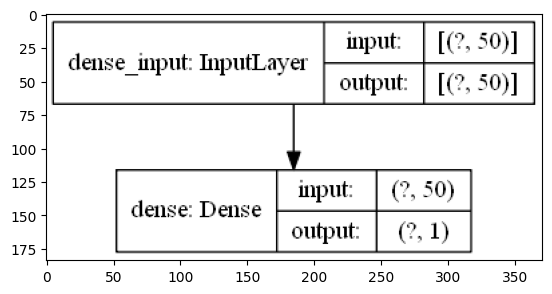

In [5]:
# visualize the model
from tensorflow.keras.utils import plot_model
plot_model(my_regression_model, show_shapes=True, show_layer_names=True)
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('model.png'))

my_regression_model.summary()

# print the theta's (called weights in neural network terminology)
my_regression_model.get_weights()

***

Compare this visualized model with the pictures at the beginning of this hands-on and see if can understand their similarity. The pictures at the beginning of this hands-on showed multiple features, whereas our problem has only one feature $x_1$. Just to explain what ```[(?,1)]``` means. The ```?``` means that this Keras model expects a matrix with an arbitrary number of rows (so an arbitrary number of the training samples). The ```1``` means that this Keras model expects a matrix with an one column (each training sample has only one feature $x_1$, as it is univariate linear regression).

Note as well that this model has one output node.

We've also printed the theta's (called weights in neural network terminology). Note that:
1. $\Theta_0$ is always initialized to 0
2. $\Theta_1$ is initialized to a random value

About 1: Maybe you've noted that compared to the first hands-on, we didn't add a column $x_0$ to X to allow for $x_0 \cdot \Theta_0$. This is because Keras adds this column by default and initializes $\Theta_0$ to 0 as we just saw. If for some reason you don't want $\Theta_0$ you can add ```use_bias=False``` to the model definition, which then becomes ```model.add(Dense(1 , activation='linear', input_dim=Xn.shape[1], use_bias=False))```.

About 2: Later you'll understand that random initialization of weights is important to enable proper learning. However, sometimes this van be annoying if you try to understand "strange results" and you would like the behavior to be reproducible. Below we show how behavior can be made reproducible.

In [6]:
# fit the model (this is the learning step)
my_regression_model.fit(Xn, y, epochs=2000, verbose=1)

Epoch 1/2000
4/4 [==============================] - 0s 3ms/step - loss: 64.1244
Epoch 2/2000
4/4 [==============================] - 0s 2ms/step - loss: 63.9740
Epoch 3/2000
4/4 [==============================] - 0s 2ms/step - loss: 63.8906
Epoch 4/2000
4/4 [==============================] - 0s 2ms/step - loss: 63.8071
Epoch 5/2000
4/4 [==============================] - 0s 2ms/step - loss: 63.7219
Epoch 6/2000
4/4 [==============================] - 0s 2ms/step - loss: 63.6340
Epoch 7/2000
4/4 [==============================] - 0s 2ms/step - loss: 63.5686
Epoch 8/2000
4/4 [==============================] - 0s 1ms/step - loss: 63.4908
Epoch 9/2000
4/4 [==============================] - 0s 2ms/step - loss: 63.4239
Epoch 10/2000
4/4 [==============================] - 0s 2ms/step - loss: 63.3576
Epoch 11/2000
4/4 [==============================] - 0s 2ms/step - loss: 63.2806
Epoch 12/2000
4/4 [==============================] - 0s 2ms/step - loss: 63.2086
Epoch 13/2000
4/4 [==================

4/4 [==============================] - 0s 2ms/step


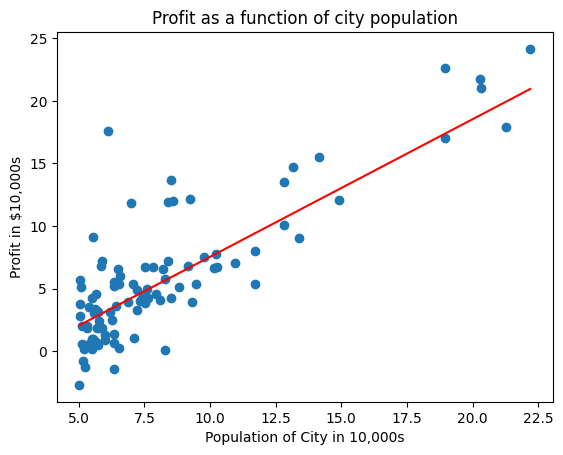

In [7]:
# visualize how the learned model fits the training data
plt.scatter(X[:,0], y)  
X_sort, predict_sort = zip(*sorted(zip(X[:,0], my_regression_model.predict(Xn))))  # sort x, y according to x to allow plotting
plt.plot(X_sort, predict_sort, 'r')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Profit as a function of city population')
plt.show()

In workshop 5 of ML1, we'll create a graphical front-end for our model. Therefore, we save the model on disk.

In [8]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(my_regression_model, 'univariateKerasRegression_tfjs_model')  # directly save in tensorflowjs format
# my_regression_model.save('univariateKerasRegression_hf5_model')  # alternatively, save in HDF5 format, which can later be converted to tensorflowjs format using the tensorflowjs_converter

***

**Discussion: understanding the weights.**

Let's see if we really understand what Keras has done. So let's get the weights of the trained model and let's plot them as a linear function. Again, don't forget to feature-normalize! 
```

Bingo! The two plotted lines coincide, meaning that we do understand what has happened under the hood.

The reason that $\Theta_0$ and $\Theta_1$ do not have the same values as for hands-on 1, univariate linear regression, is that for hands-on 1 we did not use feature normalization, but we have done for this hands-on.

4/4 [==============================] - 0s 2ms/step
theta_0 5.52593 theta_1 4.229494


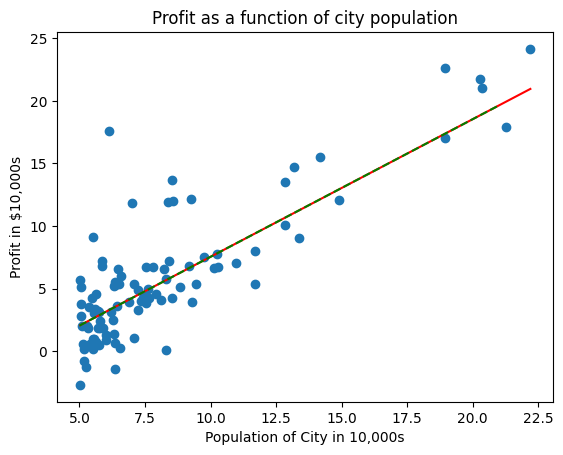

In [9]:
# this piece of code is not for using with polynomials, so skip it when polynomials are used
if not three_polynomials and not twenty_polynomials:
    
    # plot the data
    plt.scatter(X[:,0], y)  

    # plot the model prediction
    X_sort, predict_sort = zip(*sorted(zip(X[:,0], my_regression_model.predict(Xn))))  # sort x, y according to x to allow plotting
    plt.plot(X_sort, predict_sort, 'r')

    # retrieve the weights from the trained model and plot a line using these weights
    weights = my_regression_model.get_weights()
    theta_1 = weights[0][0][0]  # first one is theta_1, because it are the connections *in between* the layers n and n+1
    theta_0 = weights[1][0]  # second one and one dimension less,  because the bias is part of layer n+1
    print('theta_0', theta_0, 'theta_1', theta_1)
    x__= range(5,22)
    y__ = theta_0 + theta_1 * featureNormalize(x__)
    plt.plot(x__, y__, 'g--')

    plt.xlabel('Population of City in 10,000s')
    plt.ylabel('Profit in $10,000s')
    plt.title('Profit as a function of city population')
    plt.show()

***

**Discussion: Tensorboard.**

Tensorboard is a very handy web application for inspecting and understanding the learning behavior of your TensorFlow model, but also a Pytorch model. 
* Install Tensorboard by opening a anaconda prompt and typing ```conda install tensorboard```.
* In the anaconda command prompt, go to the folder where your project resides, using ```cd```.
* Start Tensorboard by typing ```tensorboard --logdir tensorboard_logs/``` in the anaconda command prompt.
* Open a webpage on http://localhost:6006/.
* In the source code, the code where fit() is called on the model should be adapted as follows:
  ```python
  # fit the model (this is the learning step)
  logdir = "tensorboard_logs\\" + datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = TensorBoard(log_dir=logdir)  # to enable tensorboard logging
  my_regression_model.fit(Xn, y, epochs=2000, verbose=0, callbacks=[tensorboard_callback])
  ```
* fit the model to the training data and appreciate how Tensorboard gives insight in the learning behavior, without requiring any effort. 

***

**Discussion: reproducibility.**

Note that every time the model is retrained, the results are different. This is due to the random initialization of the neurons. This is not bad, but to get fully reproducible results, we can fix the seed. This can be done by pasting the following code, as first line of the regression model.

```python
# fixed seed to get reproducible results; this line should be before any import statements!
# Seed value
# Apparently you may use different seed values at each stage
seed_value= 0

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.compat.v1.set_random_seed(seed_value)

# 5. Configure a new global `tensorflow` session
from keras import backend as K
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
K.set_session(sess)
```

***

**Discussion: validation plot.**

As mentioned before, we’ve omitted many necessary steps in this example, like inspecting the data and creating a validation set. As we'll see later, we will reserve a part of the training data to serve as a validation set. The purpose of the validation set is to determine hyperparameters, and, among others, avoid overfitting. 

We didn't create a validation set for this example. As a suggorate validation set, let's take the result of the first hands-on, and use that as a very small validation set. We assume that these are the correct values, so we call them the *expected values*. 

The better the model of our current hands-on is, the closer the prediction it makes, should be to the expected values. Let's ascertain this by plotting the predicted value as a function of the expected value.

1/1 [==============================] - 0s 17ms/step


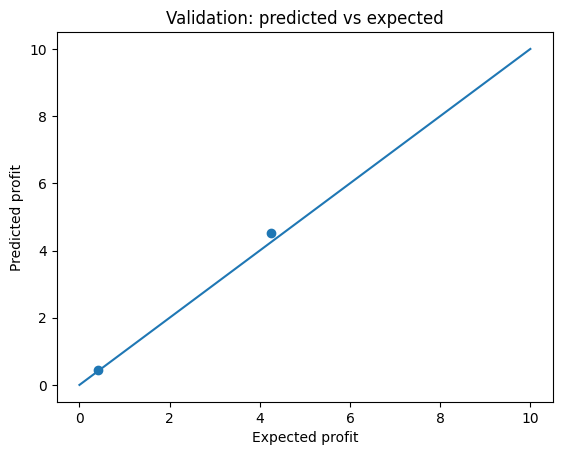

For population [[35000. 70000.]], predicted profit: [[ 4066.596 42517.7  ]] dollar
According to the first hands-on, the expected profit should be: [[ 4519.7678677  45342.45012945]] dollar


In [10]:
# create a validation set and validate the model 
Xval = np.array([3.5, 7])  # * 10000 people
yval = np.array([0.45197678677, 4.534245012945]) # * 10000 dollar
Xval = Xval[:, np.newaxis]
yval = yval[:, np.newaxis]
if three_polynomials:
    Xval = np.hstack((Xval, np.power(Xval, 2), np.power(Xval, 3)))  # shape (97,3)
if twenty_polynomials:
    poly_reg = PolynomialFeatures(degree=20, include_bias=False)
    Xval = poly_reg.fit_transform(Xval)
Xvaln = featureNormalize(Xval)
predict = my_regression_model.predict(Xvaln) 
plt.plot([0, 10], [0, 10])
plt.scatter(predict, yval)
plt.xlabel('Expected profit')
plt.ylabel('Predicted profit')
plt.title('Validation: predicted vs expected')
plt.show()
print("For population " + str(Xval.transpose() * 10000) + ", predicted profit: " + str(predict.transpose() * 10000) + " dollar")
print("According to the first hands-on, the expected profit should be: " + str(yval.transpose() * 10000) + " dollar")

***

**Discussion: polynomials and overfitting.**

Let's play around a little. If we want to fit a polynomial function (remember that this is still called linear regression), we just pass the polynomials as additional inputs. 

The code for this was already entered in the code above, but was turned off by means of flag ```three_polynomials = False```. Instead of one feature, the model has three features, where feature 2 and 3 are the square and cube of the feature 1, the population of a city. Enable the code by changing the flag to ```True``` and rerun the regression. Notice that:
* Instead of fitting a straight line, we can now fit a curved line, which can follow the dot cloud much better. By adding even higher order polynomial terms, the fit becomes neater and neater. However, no necessarily better. Domain knowledge is needed here!
* Note the big difference in the two predictions depending on the linear or polynomial model.
* If we add too many polynomials, the model can fit the training set perfectly, but will not generalize any more. This is a situation called **overfitting**, which is a very important concept in machine learning. Let's try this by setting  ```twenty_polynomials = True```. Note that the curve fits the training data too tightly and makes unrealistic predictions for large cities: overfitting.

***

**Discussion: different neural network topologies.**

Turn off polynomial fitting by setting the flag ```three_polynomials = False``` and ```twenty_polynomials = False```. Let's play around some more, but now with different neural networks. The code for this was already entered in the code above:
* by setting ```model_choice = model2``` we add an additional layer of 17 neurons between input and output. This is called a hidden layer and now it’s called deep learning.
* by setting ```model_choice = model3```, we use the same topology as model 1, but instead of a linear activation function, we use a non-linear one: ```activation='relu'```. This is an example of non-linear regression.

***

**Discussion: neural networks form a conceptual viewpoint.**
We didn't go into any depth when talking about neural networks. We'll do that later. But there's one thing I want to share already. From a high-level viewpoint, a neural network is ... simply **a function**. A function with an enormous number of parameters (called weights in neural network lingo) so that the function can approximate any shape. So it's a very general function that can represent anything that can be represented by a function. Hence the name function approximator. 

The challenge is: how do we find the values of the parameters? The heart of machine learning is that we use training data to learn the values of the parameters. 

So whenever you want to represent something, and it can be represented by a function, ... think of a neural network as a possible solution. Many of the state-of-the-art advances in machine learning are based on this conceptual view. An example are the very succesful actor-critic models. We have an actor that continues learning to give its best performance and make the critic happy. We have a critic that continues learning to provide the best possible feedback to the actor, even if the actor is already almost perfect, so that the actor can keep improving. Hey, why not represent the actor by a neural network and the critic by a neural network. The neural networks provide each other input data and keep learning from each other.

***

## Conclusion

This hands-on was to show you how to perform linear regression, using state-of-the-art libraries. Furthermore, in the discussion we've played around a bit to get a good understanding. There's no Jupyter notebook that contains a solution, as there were no exercises.